# CIFAR-10 RGB Channels CNN

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from tensorflow.keras.datasets import cifar10

In [5]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [6]:
x_train[0].shape

(32, 32, 3)

## Preprocessing

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [9]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## Model and Training

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [11]:
model = Sequential()

model.add(Conv2D(filters=32, input_shape=(32,32,3), kernel_size=(4,4), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, input_shape=(32,32,3), kernel_size=(4,4), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [14]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 45s 29ms/step - loss: 1.4834 - accuracy: 0.4630 - val_loss: 1.2714 - val_accuracy: 0.5402
Epoch 2/15
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1510 - accuracy: 0.5953 - val_loss: 1.0919 - val_accuracy: 0.6180
Epoch 3/15
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0087 - accuracy: 0.6484 - val_loss: 1.0172 - val_accuracy: 0.6450
Epoch 4/15
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9089 - accuracy: 0.6846 - val_loss: 0.9455 - val_accuracy: 0.6798
Epoch 5/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8242 - accuracy: 0.7121 - val_loss: 0.9469 - val_accuracy: 0.6736
Epoch 6/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7541 - accuracy: 0.7370 - val_loss: 0.9170 - val_accuracy: 0.6869
Epoch 7/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6898 - accuracy: 0.7588 - val_loss: 0.9163 -

In [15]:
metric_df = pd.DataFrame(model.history.history)
metric_df

,loss,accuracy,val_loss,val_accuracy
0,1.483357,0.46298,1.271352,0.5402
1,1.151046,0.59530,1.091860,0.6180
2,1.008663,0.64838,1.017210,0.6450
3,0.908942,0.68464,0.945513,0.6798
4,0.824194,0.71214,0.946924,0.6736
5,0.754079,0.73696,0.917000,0.6869
6,0.689754,0.75880,0.916345,0.6936
7,0.627811,0.77936,0.956445,0.6888
8,0.574726,0.79898,1.047044,0.6656


## Evalution

In [16]:
metric_df.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

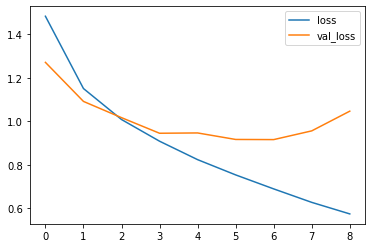

In [18]:
metric_df[['loss','val_loss']].plot()

In [19]:
model.evaluate(x_test,y_cat_test,verbose=0)

[1.0470435619354248, 0.6656000018119812]

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
predictions = model.predict_classes(x_test)
print(classification_report(y_test,predictions))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      1000
           1       0.86      0.76      0.81      1000
           2       0.53      0.59      0.56      1000
           3       0.41      0.58      0.48      1000
           4       0.71      0.49      0.58      1000
           5       0.52      0.58      0.55      1000
           6       0.72      0.75      0.73      1000
           7       0.81      0.65      0.72      1000
           8       0.82      0.76      0.79      1000
           9       0.79      0.73      0.76      1000

    accuracy                           0.67     10000
   macro avg    

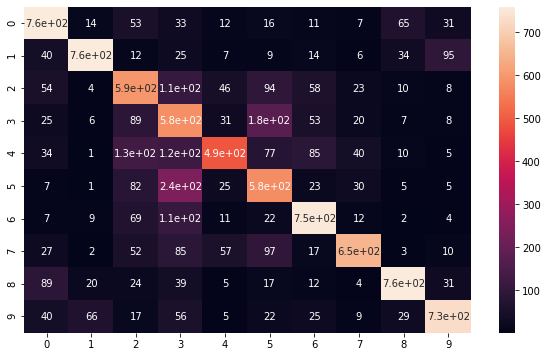

In [24]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

## Testing

In [25]:
my_image = x_test[0]

array([3], dtype=uint8)

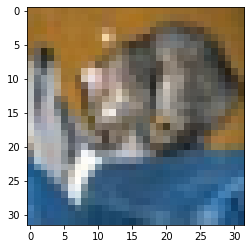

In [28]:
plt.imshow(my_image)
y_test[0]

In [27]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([3])